# 1) Loading the data and imputing missing values

# Importing the libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

# Loading the data

In [30]:
facebook_data = pd.read_csv('facebook user data - facebook user data.csv')

In [31]:
facebook_data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


# Taking data insights

In [32]:
facebook_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

We can see there are 175 null values in gender column and 2 null values in tenure column

In [33]:
facebook_data.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


# Data Cleaning

The gender feature with data type object has categorical values as male and female. We will now factorise it so that it show male as 1 and female as 0.

This is necessary because it will be easier to impute null values as well as it will be easier for the model to learn the numbers than the strings.

In [34]:
facebook_data['gender'] = facebook_data['gender'].fillna(facebook_data['gender'].mode()[0])

Now to impute tenure we will use mean as it has numerical data.

In [36]:
facebook_data['tenure'].fillna(facebook_data['tenure'].mean(),inplace=True)

In [38]:
facebook_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 99003 non-null  object 
 6   tenure                 99003 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

We use mode/mean to fill the null data because it gives better results when we are training the machine learning model, else the model will falsely interpret some values. 

# 2) Plot heatmap / correlation matrix on all the columns.

I will here make a correlation matrix using corr() and then use seaborn to plot the heatmap 

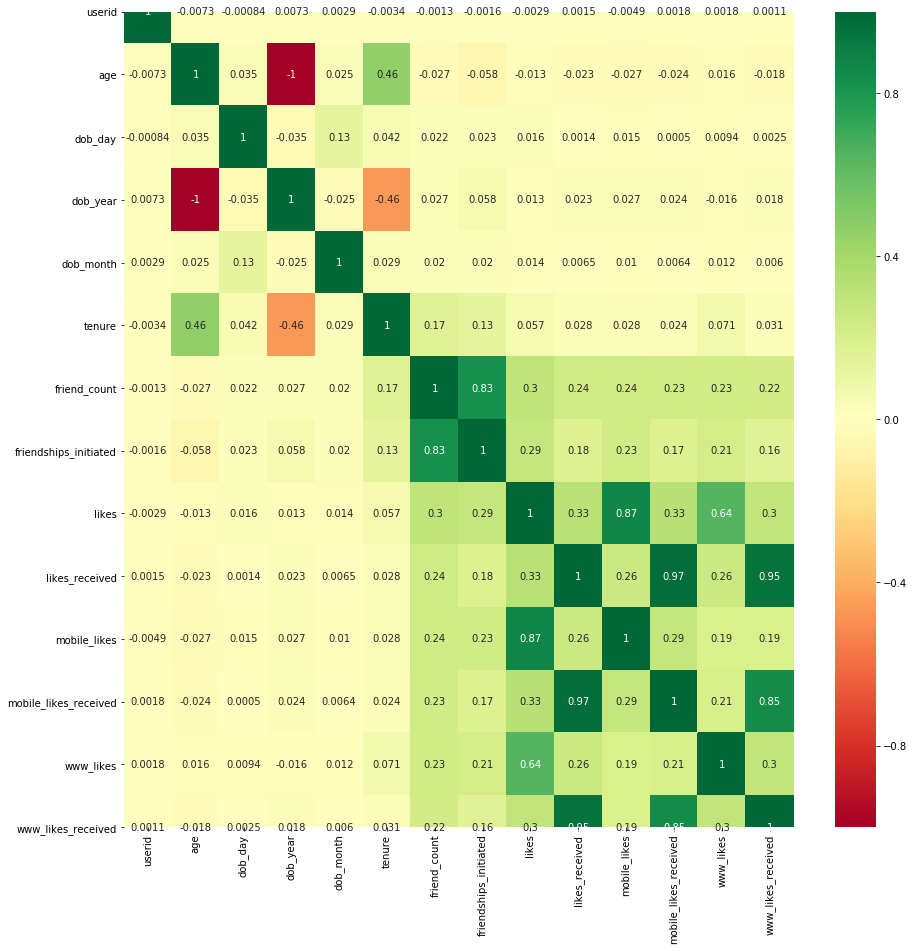

In [43]:
corrmat = facebook_data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(15,15))
g=sns.heatmap(facebook_data[top_corr_features].corr(),annot=True,cmap='RdYlGn')

Here we can see the green boxes show the features with positive correlation and the red show that the features that have negative correlation.

# 3) Analysis based on gender of the users

**What is composition of male and female users?**

In [44]:
facebook_data['gender'].value_counts()

male      58749
female    40254
Name: gender, dtype: int64

Lets plot this

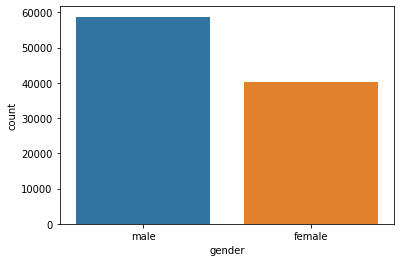

In [45]:
sns.countplot(x='gender',data=facebook_data)

In terms of percentage, here i will make a gender dataframe to plot the barplots with percentage

In [122]:
g= pd.DataFrame(dict(x=facebook_data['gender']))
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
g['x_labels']= label_encoder.fit_transform(g['x'])
g.to_csv('gender_data.csv')

Now I will create the axis ax to make barplot for percentage composition of gender

[Text(0, 0.5, 'Percent')]

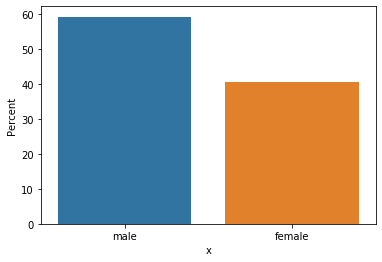

In [123]:
ax = sns.barplot(x="x", y="x_labels", data=g, estimator=lambda x: len(x) / len(g) * 100)
ax.set(ylabel="Percent")

**Which category of gender has more friends?**

I will visualize this with bar plot

In [124]:
facebook_data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


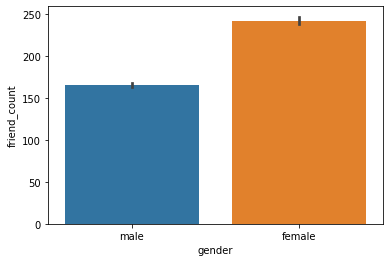

In [128]:
ax = sns.barplot(x='gender',y='friend_count',data = facebook_data)

We can see that on an average females have more friends than males.

Now I will visualize this with boxen plot in catplot to get more insights.

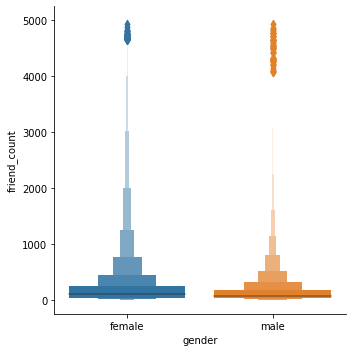

In [188]:
sns.catplot(x="gender", y="friend_count", kind="boxen",
            data=facebook_data.sort_values("gender"))

This tells us more insights like more no of females have friend_count around in 500-1000 range than males.

**Which category of gender initiated more friendships?**

I will use catplot with kind box as well as bar plot to visualize this

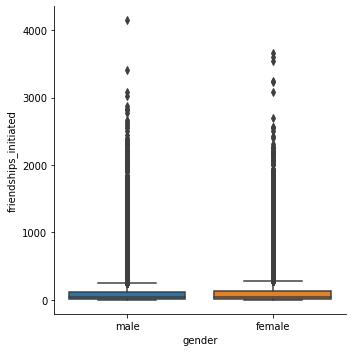

In [138]:
sns.catplot(x="gender", y="friendships_initiated",kind="box", dodge=False, data=facebook_data)

The horizontal lines tell us about 25,50,75 percentile values

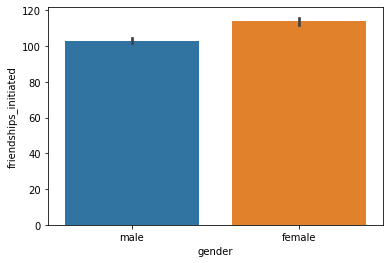

In [139]:
sns.barplot(x='gender',y='friendships_initiated',data = facebook_data)

This gives the answer to the question females have initiated more friendships than male.

**What is the distribution of tenure across different categories of gender?**

I will use catplots to see distribution of tenure across the gender:


In [197]:
facebook_data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


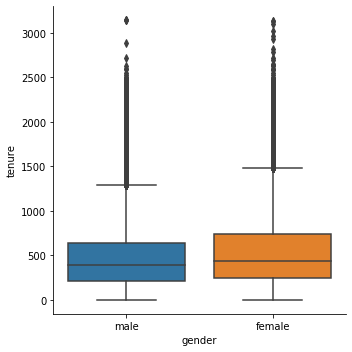

In [198]:
sns.catplot(data=facebook_data,x='gender',y='tenure', kind="box")

This shows the 0,25,50,75 percentile as well as mean values across the tenure based on gender

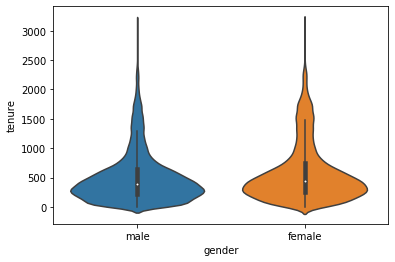

In [199]:
sns.violinplot(x=facebook_data.gender, y=facebook_data.tenure)

This gives distribution based on tenure values and gender

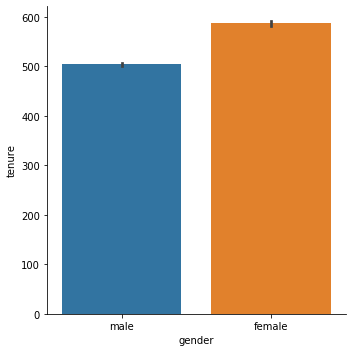

In [161]:
sns.catplot(x="gender", y="tenure", kind="bar", data=facebook_data)

Finally this bar graph shows the average values of tenure based on gender

# 4) Analysis based on the least active users on Facebook

**● How many users have no friends?**

In [179]:
facebook_data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [173]:
x=facebook_data[facebook_data['friend_count']==0]
x.shape

(1962, 15)

Shape[0] shows the number of rows which gives that 1962 users have 0 friends.

**● How many users did not like any posts?**

In [176]:
x=facebook_data[facebook_data['likes']==0]
x.shape

(22308, 15)

22308 users have not liked any post.

**● How many users did not receive any likes?**

In [177]:
x=facebook_data[facebook_data['likes_received']==0]
x.shape

(24428, 15)

24428 users have not received any likes.

# 5) Analysis based on the user accessibility (Mobile Devices vs. Web Devices)


**● What is the average number of posts liked by users (based on gender) through web vs.
mobile devices?**


Lets first explore some data based on gender

In [180]:
facebook_data.groupby('gender').count()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
gender,,,,,,,,,,,,,,
female,40254,40254,40254,40254,40254,40254,40254,40254,40254,40254,40254,40254,40254,40254
male,58749,58749,58749,58749,58749,58749,58749,58749,58749,58749,58749,58749,58749,58749


In [185]:
avg_likes=facebook_data.groupby('gender')['mobile_likes','www_likes'].mean()
avg_likes.to_csv('mean_likes.csv')
avg_likes

C:\Users\Saurabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,mobile_likes,www_likes
gender,,
female,172.912928,87.138297
male,60.348176,24.490034


This shows the average likes of the user from mobile vs from web based on gender

**● What is the average number of likes received by users (based on gender) through web
vs. mobile devices?**

In [187]:
avg_likes_received=facebook_data.groupby('gender')['mobile_likes_received','www_likes_received'].mean()
avg_likes_received.to_csv('mean_likes_received.csv')
avg_likes_received

C:\Users\Saurabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,mobile_likes_received,www_likes_received
gender,,
female,147.100884,104.334451
male,40.967199,27.210863


This shows the average likes received by the user from mobile vs from web based on gender